In [33]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [34]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [35]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [36]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [37]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [38]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The most recent date in the database is {recent_date}")

The most recent date in the database is ('2017-08-23',)


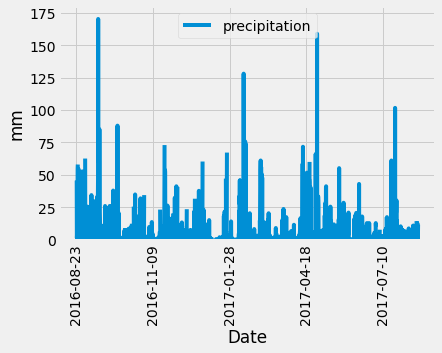

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
twelve_months_prior = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime(Measurement.date) >= (twelve_months_prior)).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns=["date", "precipitation"])
precipitation_df.set_index('date', inplace=True)

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values("date", ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot()
plt.xlabel("Date")
plt.ylabel("mm")
plt.xticks(rotation = 90)
plt.ylim(0,180)
plt.legend(['precipitation'], loc=9)
plt.show()


AttributeError: 'Line2D' object has no property 'xlabel'

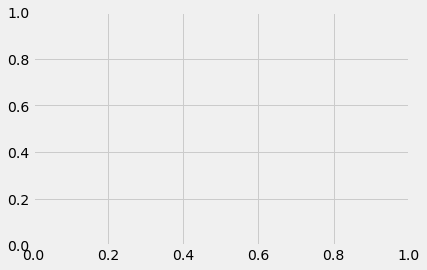

In [57]:
precipitation_df.plot(rot=90, xlabel='Date', ylabel='mm')

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number stations in the dataset
total_number_stations = session.query(Station.station).distinct().count()
print(f"The total number of stations in the dataset is {total_number_stations}")

The total number of stations in the dataset is 9


In [29]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()
    
most_active_station


[(12.2, 29.4, 22.03582251082252)]

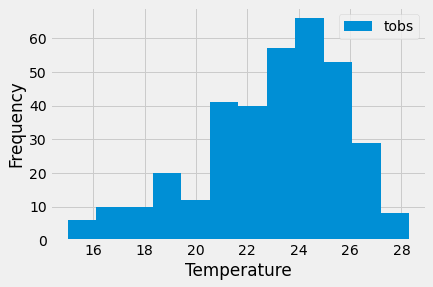

In [52]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# QUESTION - is this the 12 months for that station - as it may be different to the earlier 12 months.
## JUST USE THE TWELEVE MONTHS PRIOR VARIABLE FROM ABOVE ----------------------

# Finding out the most recent date for the most active station (USC00519281)
active_station = "USC00519281"
# active_station_recent_date = session.query(Measurement.date).\
#     filter(Measurement.station == active_station).\
#     order_by(Measurement.date.desc()).first()

# # Obtaining the date 12 months prior to the most recent date
# station_twelve_months_prior = dt.date(2017, 8, 18) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
waihee_station_temp = session.query(Measurement.date, Measurement.tobs, Measurement.station).\
    filter(func.strftime(Measurement.date) >= (twelve_months_prior)).\
    filter(Measurement.station == active_station).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
waihee_station_temp_df = pd.DataFrame(waihee_station_temp, columns=["date", "temperature", "station"])
waihee_station_temp_df.set_index('date', inplace=True)
waihee_station_temp_df.head()

# Plot a histogram
plt.hist(waihee_station_temp_df['temperature'], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(['tobs'], loc=1)
plt.show()


# Close session

In [54]:
# Close Session
session.close()